<a href="https://colab.research.google.com/github/MohamedAziz-Khezami/BI_Project/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

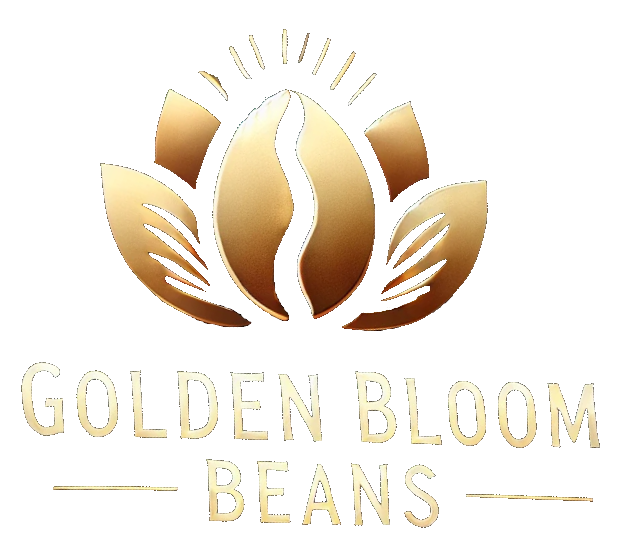

#**Introduction**
This project focuses on analyzing coffee bean sales for **Golden Bloom Beans** , customer demographics, and product performance to provide actionable insights for improving business operations and customer satisfaction.
##**Objectives**
* Which coffee products generate the highest revenue and profit?
* Customer buying behavior by region, city, or loyalty status?
* Trends in order frequency and quantity over time?
*Sales forecasting?


##**Goals**
* Increase Revenue: Identify the most profitable products and focus on promoting them.
* Enhance Customer Retention: Analyze loyalty program data to improve customer satisfaction.
* Optimize Inventory Management: Understand product demand patterns to ensure efficient stock levels.
*Expanding the company's presence in the market.

##**Deliverables**
* Power BI Dashboard.
*Recommendations Report.
*Forecasting machine learning model.



## Data Extraction
---



In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from flaml import AutoML

###Importing raw data for cleaning
df_customers:
This table contains data about the customers of the coffee business. It helps track customer demographics and their participation in the loyalty program.

Column Name	Description	Example
* customer_id:	Unique identifier for each customer.
* customer_name	:Full name of the customer.
address_line	The address of the customer (optional).	123 Coffee St.
city	The city where the customer resides.	Seattle
country	The country of the customer.	USA
postcode	Postal or ZIP code of the customer's address.	98101
loyalty_card	Indicates if the customer has a loyalty card (TRUE for yes, FALSE for no).	TRUE
2. Products Table
This table contains details about the coffee products offered by the business, including their types, sizes, prices, and profitability.

Column Name	Description	Example
product_id	Unique identifier for each product.	PROD001
coffee_type	The type of coffee (e.g., bean variety).	Arabica
roast_type	The roast level of the coffee (e.g., light, medium, dark).	Medium
size	Package size of the product in grams or kilograms.	500
unit_price	Price of one unit of the product.	15.99
price_per_100g	Price for 100 grams of the product, helpful for comparison.	3.20
profit	Profit margin for the product per unit sold.	5.00
3. Orders Table
This table records all customer orders, linking customers to products and capturing order details like date, quantity, and associated products.

Column Name	Description	Example
order_id	Unique identifier for each order.	ORD001
order_date	The date when the order was placed.	2024-01-15
customer_id	Identifier linking the order to the specific customer (customers.customer_id).	CUST001
product_id	Identifier linking the order to the specific product (products.product_id).	PROD001
quantity	Number of units of the product ordered.	3

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df_customers = pd.read_csv('/content/drive/MyDrive/project bi/customers2.csv', delimiter=';')
df_products = pd.read_excel('/content/drive/MyDrive/project bi/products.xlsx')
df_orders = pd.read_csv('/content/drive/MyDrive/project bi/orders.csv' , delimiter=";")

## Customers Table Cleaning
---

1.  We handled missing values.
2.  We dropped irrelevant columns.
3.  We handled misrepresented data types.
4. We reset the indexes



In [ ]:
df_customers.head()

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,pbote1@yelp.com,+353 (913) 396-4653,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,dazema3@facebook.com,+1 (217) 418-0714,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No


In [ ]:
df_customers.tail()

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
995,43014-53743-XK,Jennica Tewelson,jtewelsonrn@samsung.com,+1 (469) 573-8379,4040 Hoard Junction,Dallas,United States,75210,No
996,62494-09113-RP,Marguerite Graves,NaN,+1 (479) 204-9111,91413 Scott Way,Fort Smith,United States,72905,No
997,10940-42739-ET,Etan Featenby,NaN,+1 (719) 416-9560,885 Toban Plaza,Colorado Springs,United States,80920,Yes
998,64965-78386-MY,Nicolina Jenny,njennyrq@bigcartel.com,+1 (562) 679-4750,6099 American Ash Court,Whittier,United States,90610,No
999,77131-58092-GE,Vidovic Antonelli,NaN,+44 (810) 927-9266,3242 Corscot Pass,London,United Kingdom,EC1V,NaN


In [ ]:
df_customers.describe(include='all')

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
count,1000,1000,796,870,1000,1000,989,1000,992
unique,1000,1000,796,870,1000,386,3,629,2
top,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Washington,United States,D04,No
freq,1,1,1,1,1,27,776,12,508


In [ ]:
df_customers.shape

(1000, 9)

In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     1000 non-null   object
 1   Customer Name   1000 non-null   object
 2   Email           796 non-null    object
 3   Phone Number    870 non-null    object
 4   Address Line 1  1000 non-null   object
 5   City            1000 non-null   object
 6   Country         989 non-null    object
 7   Postcode        1000 non-null   object
 8   Loyalty Card    992 non-null    object
dtypes: object(9)
memory usage: 70.4+ KB


In [ ]:
df_customers.isnull().sum()

,0
Customer ID,0
Customer Name,0
Email,204
Phone Number,130
Address Line 1,0
City,0
Country,11
Postcode,0
Loyalty Card,8


In [ ]:
df_customers.drop(columns=['Email', 'Phone Number'], inplace=True)


In [ ]:
#Countries missing values handeling
city_to_country = {
    'Provo': 'United States',
    'Saint Paul': 'United States',
    'Wootton': 'United Kingdom',
    'Cherryville': 'United States',
    'Whittier': 'United States',
    'Orlando': 'United States',
    'Twyford': 'United Kingdom',
    'Daingean': 'Ireland',
    'Mobile': 'United States',
    'San Francisco': 'United States',
    'Watergrasshill': 'Ireland'
}
df_customers['Country'] = df_customers['Country'].fillna(df_customers['City'].map(city_to_country))

In [ ]:
#Loyalty card missing values handelling

most_freq_us = df_customers[df_customers['Country'] == 'United States']['Loyalty Card'].mode()[0]
most_freq_uk = df_customers[df_customers['Country'] == 'United Kingdom']['Loyalty Card'].mode()[0]
most_freq_ir = df_customers[df_customers['Country'] == 'Ireland']['Loyalty Card'].mode()[0]


df_customers['Loyalty Card'] = df_customers.apply(
    lambda row: most_freq_us if pd.isnull(row['Loyalty Card']) and row['Country'] == 'United States' else
    most_freq_uk if pd.isnull(row['Loyalty Card']) and row['Country'] == 'United Kingdom' else
    most_freq_ir if pd.isnull(row['Loyalty Card']) and row['Country'] == 'Ireland' else
    row['Loyalty Card'],
    axis=1
)





In [ ]:
#changing to boolean
df_customers['Loyalty Card'] = df_customers['Loyalty Card'].apply(lambda x: True if x == 'Yes' else False)

In [ ]:
df_customers.isnull().sum()

,0
Customer ID,0
Customer Name,0
Address Line 1,0
City,0
Country,0
Postcode,0
Loyalty Card,0


In [ ]:
df_customers.apply(lambda col: col.duplicated().any(), axis=0)

,0
Customer ID,False
Customer Name,False
Address Line 1,False
City,True
Country,True
Postcode,True
Loyalty Card,True


In [ ]:
df_customers.reset_index(drop=True, inplace=True)

In [ ]:
df_customers.sort_values(by='Customer ID', inplace=True)

In [ ]:
df_customers.head()

,Customer ID,Customer Name,Address Line 1,City,Country,Postcode,Loyalty Card
690,00246-15080-LE,Francesco Dressel,1 Fulton Road,Toledo,United States,43605,False
168,00256-19905-YG,Stanislaus Valsler,95 Southridge Alley,Castlebridge,Ireland,R14,False
628,00445-42781-KX,Faunie Brigham,7246 Green Pass,Castlerea,Ireland,F45,True
101,00539-42510-RY,Nickey Youles,12461 Dryden Pass,Edgeworthstown,Ireland,E25,True
925,00841-75330-ZV,Rori Ollin,05889 Heath Place,Pasadena,United States,91199,True


## Products Table Cleaning
---

In [ ]:
df_products.head()

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965
1,A-L-0.5,Ara,L,0.5,7.770,1.5540,0.69930
2,A-L-1,Ara,L,1.0,12.950,1.2950,1.16550
3,A-L-2.5,Ara,L,2.5,29.785,1.1914,2.68065
4,A-M-0.2,Ara,M,0.2,3.375,1.6875,0.30375


In [ ]:
df_products.tail()

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
43,E-M-2.5,Exc,M,2.5,31.625,1.2650,3.47875
44,E-D-0.2,Exc,D,0.2,3.645,1.8225,0.40095
45,E-D-0.5,Exc,D,0.5,7.290,1.4580,0.80190
46,E-D-1,Exc,D,1.0,12.150,1.2150,1.33650
47,E-D-2.5,Exc,D,2.5,27.945,1.1178,3.07395


In [ ]:
df_products.describe(include='all')

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
count,48,48,48,48.000000,48.000000,48.000000,48.000000
unique,48,4,3,NaN,NaN,NaN,NaN
top,A-L-0.2,Ara,L,NaN,NaN,NaN,NaN
freq,1,12,16,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.050000,13.046250,1.435087,1.316219
std,NaN,NaN,NaN,0.893951,9.953578,0.371981,1.161426
min,NaN,NaN,NaN,0.200000,2.685000,0.823400,0.161100
25%,NaN,NaN,NaN,0.425000,5.216250,1.191400,0.501300
50%,NaN,NaN,NaN,0.750000,9.230000,1.370600,0.943800
75%,NaN,NaN,NaN,1.375000,17.033750,1.659375,1.657700


In [ ]:
df_products.shape

(48, 7)

In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      48 non-null     object 
 1   Coffee Type     48 non-null     object 
 2   Roast Type      48 non-null     object 
 3   Size            48 non-null     float64
 4   Unit Price      48 non-null     float64
 5   Price per 100g  48 non-null     float64
 6   Profit          48 non-null     float64
dtypes: float64(4), object(3)
memory usage: 2.8+ KB


In [ ]:
df_products.isna().sum()

,0
Product ID,0
Coffee Type,0
Roast Type,0
Size,0
Unit Price,0
Price per 100g,0
Profit,0


## Orders Table Cleaning
---

In [ ]:
df_orders.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
0,QEV-37451-860,05/09/2019,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QEV-37451-860,05/09/2019,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FAA-43335-268,17/06/2021,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KAC-83089-793,15/07/2021,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KAC-83089-793,15/07/2021,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_orders.tail()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
995,RLM-96511-467,06/01/2020,43014-53743-XK,R-L-2.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,AEZ-13242-456,04/05/2022,62494-09113-RP,R-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,UME-75640-698,11/10/2019,62494-09113-RP,A-M-0.5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,GJC-66474-557,03/08/2021,64965-78386-MY,A-D-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,IRV-20769-219,15/10/2020,77131-58092-GE,E-M-0.2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_orders.describe(include='all')

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
count,1000,1000,1000,1000,1000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,957,689,913,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NOP-21394-646,27/04/2019,86579-92122-OC,A-M-0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,7,7,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.551000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.681733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_orders.shape

(1000, 13)

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       1000 non-null   object 
 1   Order Date     1000 non-null   object 
 2   Customer ID    1000 non-null   object 
 3   Product ID     1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Customer Name  0 non-null      float64
 6   Email          0 non-null      float64
 7   Country        0 non-null      float64
 8   Coffee Type    0 non-null      float64
 9   Roast Type     0 non-null      float64
 10  Size           0 non-null      float64
 11  Unit Price     0 non-null      float64
 12  Sales          0 non-null      float64
dtypes: float64(8), int64(1), object(4)
memory usage: 101.7+ KB


In [ ]:
df_orders.isna().sum()

,0
Order ID,0
Order Date,0
Customer ID,0
Product ID,0
Quantity,0
Customer Name,1000
Email,1000
Country,1000
Coffee Type,1000
Roast Type,1000


In [ ]:
df_orders.apply(lambda col: col.duplicated().any(), axis=0)

,0
Order ID,True
Order Date,True
Customer ID,True
Product ID,True
Quantity,True
Customer Name,True
Email,True
Country,True
Coffee Type,True
Roast Type,True


In [ ]:
df_orders = df_orders.iloc[:, 0:5]
df_orders.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity
0,QEV-37451-860,05/09/2019,17670-51384-MA,R-M-1,2
1,QEV-37451-860,05/09/2019,17670-51384-MA,E-M-0.5,5
2,FAA-43335-268,17/06/2021,21125-22134-PX,A-L-1,1
3,KAC-83089-793,15/07/2021,23806-46781-OU,E-M-1,2
4,KAC-83089-793,15/07/2021,23806-46781-OU,R-L-2.5,2


In [ ]:
df_orders['Order Date'] = pd.to_datetime(df_orders['Order Date'] , format='%d/%m/%Y' , dayfirst=True)
df_orders.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2


In [ ]:
df_orders.sort_values(by='Order Date', inplace=True, ascending=True)
df_orders.reset_index(drop=True, inplace=True)
df_orders.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity
0,CTE-31437-326,2019-01-02,22721-63196-UJ,E-M-0.2,4
1,CTE-31437-326,2019-01-02,22721-63196-UJ,L-L-0.2,3
2,CTE-31437-326,2019-01-02,22721-63196-UJ,L-D-1,4
3,CTE-31437-326,2019-01-02,22721-63196-UJ,R-M-0.2,4
4,EZT-46571-659,2019-01-02,03396-68805-ZC,R-M-0.5,3


# **Connecting azure mysql server to the python app**
---

In [ ]:
!pip install mysql-connector-python

In [128]:
import mysql.connector

# Define connection parameters
cnx = mysql.connector.connect(
    user="adminproject",  # Your Azure MySQL username
    password="Projectbi123",  # Your Azure MySQL password
    host="biserver.mysql.database.azure.com",  # Your Azure MySQL server
    port=3306,  # Default MySQL port
    database="coffee",  # Name of your database
    ssl_disabled=False  # SSL must not be disabled for Azure MySQL
)

# Test connection
if cnx.is_connected():
    print("Connection successful!")
else:
    print("Connection failed!")


cursor = cnx.cursor()


Connection successful!


In [129]:



# Define the table name
table_name = "customers"

# Create an insert query template
insert_query = f"""
    INSERT INTO {table_name} (customer_id, customer_name, address_line, city, country, postcode, loyalty_card)
    VALUES (%s, %s, %s, %s, %s, %s ,%s)
"""

# Upload DataFrame to MySQL
for _, row in df_customers.iterrows():
    cursor.execute(insert_query, tuple(row))

# Commit the transaction
cnx.commit()
print(f"{len(df_customers)} rows inserted into {table_name} table.")





NameError: name 'df_customers' is not defined

In [ ]:
# Define the table name
table_name = "products"

# Create an insert query template
insert_query = f"""
    INSERT INTO {table_name} (product_id, coffee_type, roast_type, size, unit_price, price_per_100g, profit)
    VALUES (%s, %s, %s, %s, %s, %s, %s)
"""

# Upload DataFrame to MySQL
for _, row in df_products.iterrows():

    cursor.execute(insert_query, tuple(row))

# Commit the transaction
cnx.commit()
print(f"{len(df_products)} rows inserted into {table_name} table.")


In [ ]:
# Define the table name
table_name = "orders"

# Create an insert query template
insert_query = f"""
    INSERT INTO {table_name} (order_id, order_date, customer_id, product_id, quantity)
    VALUES (%s, %s, %s, %s, %s)
"""

# Upload DataFrame to MySQL
for _, row in df_orders.iterrows():
    row['Order Date'] = row['Order Date'].strftime('%Y-%m-%d %H:%M:%S')  # Convert to string
    cursor.execute(insert_query, tuple(row))

# Commit the transaction
cnx.commit()
print(f"{len(df_orders)} rows inserted into {table_name} table.")


# **PowerBI Dashboard**
---
Screenshots of our BI dashboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 46.8 MB/s eta 0:00:00


# **Mahcine Learning Forecasting**
---

### **Importing from the cloud server**

In [130]:
import mysql.connector

cnx = mysql.connector.connect(
    user="adminproject",  # Your Azure MySQL username
    password="Projectbi123",  # Your Azure MySQL password
    host="biserver.mysql.database.azure.com",  # Your Azure MySQL server
    port=3306,  # Default MySQL port
    database="coffee",  # Name of your database
    ssl_disabled=False  # SSL must not be disabled for Azure MySQL
)


# Test connection
if cnx.is_connected():
    print("Connection successful!")
else:
    print("Connection failed!")

# Create a cursor object to execute SQL queries
cursor = cnx.cursor()




Connection successful!


In [131]:
#Fetch data from a table
sql = "SELECT * FROM customers"
cursor.execute(sql)

# Read data into a pandas DataFrame
df_customer = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
df_customer.head()

,customer_id,customer_name,address_line,city,country,postcode,loyalty_card
0,00246-15080-LE,Francesco Dressel,1 Fulton Road,Toledo,United States,43605,0
1,00256-19905-YG,Stanislaus Valsler,95 Southridge Alley,Castlebridge,Ireland,R14,0
2,00445-42781-KX,Faunie Brigham,7246 Green Pass,Castlerea,Ireland,F45,1
3,00539-42510-RY,Nickey Youles,12461 Dryden Pass,Edgeworthstown,Ireland,E25,1
4,00841-75330-ZV,Rori Ollin,05889 Heath Place,Pasadena,United States,91199,1


In [132]:
#Fetch data from a table
sql = "SELECT * FROM products"
cursor.execute(sql)

# Read data into a pandas DataFrame
df_product = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
df_product.head()

,product_id,coffee_type,roast_type,size,unit_price,price_per_100g,profit
0,A-D-0.2,Ara,D,0.2,2.985,1.4925,0.26865
1,A-D-0.5,Ara,D,0.5,5.970,1.1940,0.53730
2,A-D-1,Ara,D,1.0,9.950,0.9950,0.89550
3,A-D-2.5,Ara,D,2.5,22.885,0.9154,2.05965
4,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965


In [133]:
#Fetch data from a table
sql = "SELECT * FROM orders"
cursor.execute(sql)

# Read data into a pandas DataFrame
df_order = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
df_order.head()

,order_id,order_date,customer_id,product_id,quantity
0,CTE-31437-326,2019-01-02,22721-63196-UJ,E-M-0.2,4
1,CTE-31437-326,2019-01-02,22721-63196-UJ,L-L-0.2,3
2,CTE-31437-326,2019-01-02,22721-63196-UJ,L-D-1,4
3,CTE-31437-326,2019-01-02,22721-63196-UJ,R-M-0.2,4
4,EZT-46571-659,2019-01-02,03396-68805-ZC,R-M-0.5,3


###**Preparing data for Forecasting**

In [134]:
prod_rev_profit = df_product[['product_id', 'unit_price', 'profit']]
prod_rev_profit.head()

,product_id,unit_price,profit
0,A-D-0.2,2.985,0.26865
1,A-D-0.5,5.970,0.53730
2,A-D-1,9.950,0.89550
3,A-D-2.5,22.885,2.05965
4,A-L-0.2,3.885,0.34965


In [135]:
df_order_rev_profit = df_order.merge(prod_rev_profit, on='product_id')
df_order_rev_profit.head()

,order_id,order_date,customer_id,product_id,quantity,unit_price,profit
0,CTE-31437-326,2019-01-02,22721-63196-UJ,E-M-0.2,4,4.125,0.45375
1,CTE-31437-326,2019-01-02,22721-63196-UJ,L-L-0.2,3,4.755,0.61815
2,CTE-31437-326,2019-01-02,22721-63196-UJ,L-D-1,4,12.950,1.68350
3,CTE-31437-326,2019-01-02,22721-63196-UJ,R-M-0.2,4,2.985,0.17910
4,EZT-46571-659,2019-01-02,03396-68805-ZC,R-M-0.5,3,5.970,0.35820


In [136]:
df_order_rev_profit['revenue'] = df_order_rev_profit['quantity'] * df_order_rev_profit['unit_price']
df_order_rev_profit.head()

,order_id,order_date,customer_id,product_id,quantity,unit_price,profit,revenue
0,CTE-31437-326,2019-01-02,22721-63196-UJ,E-M-0.2,4,4.125,0.45375,16.500
1,CTE-31437-326,2019-01-02,22721-63196-UJ,L-L-0.2,3,4.755,0.61815,14.265
2,CTE-31437-326,2019-01-02,22721-63196-UJ,L-D-1,4,12.950,1.68350,51.800
3,CTE-31437-326,2019-01-02,22721-63196-UJ,R-M-0.2,4,2.985,0.17910,11.940
4,EZT-46571-659,2019-01-02,03396-68805-ZC,R-M-0.5,3,5.970,0.35820,17.910


In [137]:
df_order_rev_profit['profit'] = df_order_rev_profit['quantity'] * df_order_rev_profit['profit']
df_order_rev_profit.head()

,order_id,order_date,customer_id,product_id,quantity,unit_price,profit,revenue
0,CTE-31437-326,2019-01-02,22721-63196-UJ,E-M-0.2,4,4.125,1.81500,16.500
1,CTE-31437-326,2019-01-02,22721-63196-UJ,L-L-0.2,3,4.755,1.85445,14.265
2,CTE-31437-326,2019-01-02,22721-63196-UJ,L-D-1,4,12.950,6.73400,51.800
3,CTE-31437-326,2019-01-02,22721-63196-UJ,R-M-0.2,4,2.985,0.71640,11.940
4,EZT-46571-659,2019-01-02,03396-68805-ZC,R-M-0.5,3,5.970,1.07460,17.910


In [138]:
df_train_revenue = df_order_rev_profit.groupby('order_date')['revenue'].sum().reset_index()
df_train_revenue.head()

,order_date,revenue
0,2019-01-02,112.415
1,2019-01-03,74.970
2,2019-01-06,28.440
3,2019-01-09,111.780
4,2019-01-10,96.155


In [139]:
df_train_profit = df_order_rev_profit.groupby('order_date')['profit'].sum().reset_index()
df_train_profit.head()

,order_date,profit
0,2019-01-02,12.19445
1,2019-01-03,7.17120
2,2019-01-06,2.53140
3,2019-01-09,12.29580
4,2019-01-10,8.32115


In [140]:
df_train_revenue.sort_values(by='order_date', inplace=True)
df_train_profit.sort_values(by='order_date', inplace=True)

In [141]:
df_train_profit.tail()

,order_date,profit
684,2022-08-06,2.68650
685,2022-08-08,1.28880
686,2022-08-12,1.43400
687,2022-08-17,3.49650
688,2022-08-19,4.70085


###**Using Facebook Prophet forecasting library**

In [142]:
import pandas as pd
import plotly.graph_objects as go
from prophet import Prophet
import numpy as np

# Prepare the data for Prophet
for df in [df_train_revenue, df_train_profit]:
    df.columns = ['ds', 'y']  # Rename columns to 'ds' (date) and 'y' (value)
    df['ds'] = pd.to_datetime(df['ds'])

# Fit the Prophet model for revenue
model_revenue = Prophet()
model_revenue.fit(df_train_revenue)

# Fit the Prophet model for profit
model_profit = Prophet()
model_profit.fit(df_train_profit)

# Create future dataframes for predictions
future_revenue = model_revenue.make_future_dataframe(periods=90, freq='D', include_history=True)
forecast_revenue = model_revenue.predict(future_revenue)

future_profit = model_profit.make_future_dataframe(periods=90, freq='D', include_history=True)
forecast_profit = model_profit.predict(future_profit)

# Plot using Plotly
fig = go.Figure()

# Add historical data for revenue
fig.add_trace(go.Scatter(x=df_train_revenue['ds'], y=df_train_revenue['y'],
                         mode='lines',
                         name='Revenue Historical',
                         line=dict(color='blue'),
                         hovertemplate='Date: %{x}<br>Revenue: %{y}<extra></extra>'))

# Add predictions for revenue
fig.add_trace(go.Scatter(x=forecast_revenue['ds'], y=forecast_revenue['yhat'],
                         mode='lines',
                         name='Revenue Prediction',
                         line=dict(color='orange'),
                         hovertemplate='Date: %{x}<br>Predicted Revenue: %{y}<extra></extra>'))

# Add prediction intervals for revenue
fig.add_trace(go.Scatter(
    x=list(forecast_revenue['ds']) + list(forecast_revenue['ds'][::-1]),
    y=list(forecast_revenue['yhat_upper']) + list(forecast_revenue['yhat_lower'][::-1]),
    fill='toself',
    fillcolor='rgba(255, 165, 0, 0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Revenue Prediction Uncertainty',
    hoverinfo='skip'))

# Add historical data for profit
fig.add_trace(go.Scatter(x=df_train_profit['ds'], y=df_train_profit['y'],
                         mode='lines',
                         name='Profit Historical',
                         line=dict(color='green'),
                         hovertemplate='Date: %{x}<br>Profit: %{y}<extra></extra>'))

# Add predictions for profit
fig.add_trace(go.Scatter(x=forecast_profit['ds'], y=forecast_profit['yhat'],
                         mode='lines',
                         name='Profit Prediction',
                         line=dict(color='red'),
                         hovertemplate='Date: %{x}<br>Predicted Profit: %{y}<extra></extra>'))

# Add prediction intervals for profit
fig.add_trace(go.Scatter(
    x=list(forecast_profit['ds']) + list(forecast_profit['ds'][::-1]),
    y=list(forecast_profit['yhat_upper']) + list(forecast_profit['yhat_lower'][::-1]),
    fill='toself',
    fillcolor='rgba(255, 0, 0, 0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Profit Prediction Uncertainty',
    hoverinfo='skip'))

# Update layout
fig.update_layout(
    title='Sales Forecasting with Prophet (Revenue & Profit)',
    xaxis_title='Date',
    yaxis_title='Value',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    template='plotly_white'
)

# Show plot
fig.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp53y5gpoq/0qiror4r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp53y5gpoq/dvvilu3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52299', 'data', 'file=/tmp/tmp53y5gpoq/0qiror4r.json', 'init=/tmp/tmp53y5gpoq/dvvilu3j.json', 'output', 'file=/tmp/tmp53y5gpoq/prophet_modelhksy4po4/prophet_model-20241221182549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:25:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:25:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp53

In [150]:
df_total = df_order.merge(df_product, on='product_id')
df_total.head()

,order_id,order_date,customer_id,product_id,quantity,coffee_type,roast_type,size,unit_price,price_per_100g,profit
0,CTE-31437-326,2019-01-02,22721-63196-UJ,E-M-0.2,4,Exc,M,0.2,4.125,2.0625,0.45375
1,CTE-31437-326,2019-01-02,22721-63196-UJ,L-L-0.2,3,Lib,L,0.2,4.755,2.3775,0.61815
2,CTE-31437-326,2019-01-02,22721-63196-UJ,L-D-1,4,Lib,D,1.0,12.950,1.2950,1.68350
3,CTE-31437-326,2019-01-02,22721-63196-UJ,R-M-0.2,4,Rob,M,0.2,2.985,1.4925,0.17910
4,EZT-46571-659,2019-01-02,03396-68805-ZC,R-M-0.5,3,Rob,M,0.5,5.970,1.1940,0.35820


In [151]:
df_total = df_total.merge(df_customer, on='customer_id')
df_total.head()

,order_id,order_date,customer_id,product_id,quantity,coffee_type,roast_type,size,unit_price,price_per_100g,profit,customer_name,address_line,city,country,postcode,loyalty_card
0,CTE-31437-326,2019-01-02,22721-63196-UJ,E-M-0.2,4,Exc,M,0.2,4.125,2.0625,0.45375,Gladi Ducker,5069 Boyd Parkway,Belfast,United Kingdom,BT2,0
1,CTE-31437-326,2019-01-02,22721-63196-UJ,L-L-0.2,3,Lib,L,0.2,4.755,2.3775,0.61815,Gladi Ducker,5069 Boyd Parkway,Belfast,United Kingdom,BT2,0
2,CTE-31437-326,2019-01-02,22721-63196-UJ,L-D-1,4,Lib,D,1.0,12.950,1.2950,1.68350,Gladi Ducker,5069 Boyd Parkway,Belfast,United Kingdom,BT2,0
3,CTE-31437-326,2019-01-02,22721-63196-UJ,R-M-0.2,4,Rob,M,0.2,2.985,1.4925,0.17910,Gladi Ducker,5069 Boyd Parkway,Belfast,United Kingdom,BT2,0
4,EZT-46571-659,2019-01-02,03396-68805-ZC,R-M-0.5,3,Rob,M,0.5,5.970,1.1940,0.35820,Guthrey Petracci,949 Paget Parkway,Los Angeles,United States,90045,0


In [152]:
df_total['total_profit'] = df_total['quantity'] * df_total['profit']
df_total.head()

,order_id,order_date,customer_id,product_id,quantity,coffee_type,roast_type,size,unit_price,price_per_100g,profit,customer_name,address_line,city,country,postcode,loyalty_card,total_profit
0,CTE-31437-326,2019-01-02,22721-63196-UJ,E-M-0.2,4,Exc,M,0.2,4.125,2.0625,0.45375,Gladi Ducker,5069 Boyd Parkway,Belfast,United Kingdom,BT2,0,1.81500
1,CTE-31437-326,2019-01-02,22721-63196-UJ,L-L-0.2,3,Lib,L,0.2,4.755,2.3775,0.61815,Gladi Ducker,5069 Boyd Parkway,Belfast,United Kingdom,BT2,0,1.85445
2,CTE-31437-326,2019-01-02,22721-63196-UJ,L-D-1,4,Lib,D,1.0,12.950,1.2950,1.68350,Gladi Ducker,5069 Boyd Parkway,Belfast,United Kingdom,BT2,0,6.73400
3,CTE-31437-326,2019-01-02,22721-63196-UJ,R-M-0.2,4,Rob,M,0.2,2.985,1.4925,0.17910,Gladi Ducker,5069 Boyd Parkway,Belfast,United Kingdom,BT2,0,0.71640
4,EZT-46571-659,2019-01-02,03396-68805-ZC,R-M-0.5,3,Rob,M,0.5,5.970,1.1940,0.35820,Guthrey Petracci,949 Paget Parkway,Los Angeles,United States,90045,0,1.07460


In [153]:
df_total = df_total[[ 'coffee_type', 'roast_type', 'unit_price', 'country', 'loyalty_card', 'total_profit']]
df_total.head()

,coffee_type,roast_type,unit_price,country,loyalty_card,total_profit
0,Exc,M,4.125,United Kingdom,0,1.81500
1,Lib,L,4.755,United Kingdom,0,1.85445
2,Lib,D,12.950,United Kingdom,0,6.73400
3,Rob,M,2.985,United Kingdom,0,0.71640
4,Rob,M,5.970,United States,0,1.07460


In [92]:
!pip install flaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.2/314.2 kB 5.5 MB/s eta 0:00:00


In [154]:
from flaml import AutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

x = df_total.drop(columns=['total_profit'])
y = df_total['total_profit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = AutoML()

model.fit(x_train, y_train, task='regression', time_budget=600)

print('Best ML leaner:', model.best_estimator)
print('Best hyperparmeter config:', model.best_config)
print('Best MSE on validation data:', model.best_loss)

prediction = model.predict(x_test)

mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


[flaml.automl.logger: 12-21 18:29:10] {1728} INFO - task = regression
[flaml.automl.logger: 12-21 18:29:10] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 12-21 18:29:10] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 12-21 18:29:10] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd']
[flaml.automl.logger: 12-21 18:29:10] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 12-21 18:29:10] {2393} INFO - Estimated sufficient time budget=3529s. Estimated necessary time budget=25s.
[flaml.automl.logger: 12-21 18:29:10] {2442} INFO -  at 0.4s,	estimator lgbm's best error=0.6608,	best estimator lgbm's best error=0.6608
[flaml.automl.logger: 12-21 18:29:10] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 12-21 18:29:11] {2442} INFO -  at 1.3s,	estimator lgbm's best error=0.6608,	best estimator lgbm's best error=0.6608
[flaml.automl.logger: 12-21 18:29:11] {2258} 

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 12-21 18:29:11] {2442} INFO -  at 1.6s,	estimator sgd's best error=0.8468,	best estimator lgbm's best error=0.6608
[flaml.automl.logger: 12-21 18:29:11] {2258} INFO - iteration 3, current learner sgd
[flaml.automl.logger: 12-21 18:29:11] {2442} INFO -  at 1.7s,	estimator sgd's best error=0.8468,	best estimator lgbm's best error=0.6608
[flaml.automl.logger: 12-21 18:29:11] {2258} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 12-21 18:29:12] {2442} INFO -  at 1.8s,	estimator lgbm's best error=0.4526,	best estimator lgbm's best error=0.4526
[flaml.automl.logger: 12-21 18:29:12] {2258} INFO - iteration 5, current learner sgd
[flaml.automl.logger: 12-21 18:29:12] {2442} INFO -  at 2.0s,	estimator sgd's best error=0.8468,	best estimator lgbm's best error=0.4526
[flaml.automl.logger: 12-21 18:29:12] {2258} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 12-21 18:29:12] {2442} INFO -  at 2.3s,	estimator lgbm's best error=0.3764,	best estima

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[flaml.automl.logger: 12-21 18:29:20] {2442} INFO -  at 10.4s,	estimator sgd's best error=0.7080,	best estimator lgbm's best error=0.3715
[flaml.automl.logger: 12-21 18:29:20] {2258} INFO - iteration 52, current learner lgbm
[flaml.automl.logger: 12-21 18:29:20] {2442} INFO -  at 10.5s,	estimator lgbm's best error=0.3715,	best estimator lgbm's best error=0.3715
[flaml.automl.logger: 12-21 18:29:20] {2258} INFO - iteration 53, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[flaml.automl.logger: 12-21 18:29:20] {2442} INFO -  at 10.5s,	estimator lgbm's best error=0.3715,	best estimator lgbm's best error=0.3715
[flaml.automl.logger: 12-21 18:29:20] {2258} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 12-21 18:29:20] {2442} INFO -  at 10.6s,	estimator lgbm's best error=0.3715,	best estimator lgbm's best error=0.3715
[flaml.automl.logger: 12-21 18:29:20] {2258} INFO - iteration 55, current learner lgbm
[flaml.automl.logger: 12-21 18:29:21] {2442} INFO -  at 10.7s,	estimator lgbm's best error=0.3715,	best estimator lgbm's best error=0.3715
[flaml.automl.logger: 12-21 18:29:21] {2258} INFO - iteration 56, current learner xgboost
[flaml.automl.logger: 12-21 18:29:21] {2442} INFO -  at 10.9s,	estimator xgboost's best error=0.3828,	best estimator lgbm's best error=0.3715
[flaml.automl.logger: 12-21 18:29:21] {2258} INFO - iteration 57, current learner lgbm
[flaml.automl.logger: 12-21 18:29:21] {2442} INFO -  at 11.0s,	estimator lgbm's best error

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[flaml.automl.logger: 12-21 18:29:27] {2442} INFO -  at 17.6s,	estimator sgd's best error=0.7080,	best estimator lgbm's best error=0.3714
[flaml.automl.logger: 12-21 18:29:27] {2258} INFO - iteration 86, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[flaml.automl.logger: 12-21 18:29:28] {2442} INFO -  at 18.0s,	estimator xgboost's best error=0.3828,	best estimator lgbm's best error=0.3714
[flaml.automl.logger: 12-21 18:29:28] {2258} INFO - iteration 87, current learner extra_tree
[flaml.automl.logger: 12-21 18:29:28] {2442} INFO -  at 18.3s,	estimator extra_tree's best error=0.3886,	best estimator lgbm's best error=0.3714
[flaml.automl.logger: 12-21 18:29:28] {2258} INFO - iteration 88, current learner lgbm
[flaml.automl.logger: 12-21 18:29:28] {2442} INFO -  at 18.3s,	estimator lgbm's best error=0.3714,	best estimator lgbm's best error=0.3714
[flaml.automl.logger: 12-21 18:29:28] {2258} INFO - iteration 89, current learner lgbm
[flaml.automl.logger: 12-21 18:29:28] {2442} INFO -  at 18.4s,	estimator lgbm's best error=0.3714,	best estimator lgbm's best error=0.3714
[flaml.automl.logger: 12-21 18:29:28] {2258} INFO - iteration 90, current learner extra_tree
[flaml.automl.logger: 12-21 18:29:29] {2442} INFO -  at 19.3s,	estimator ex

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[flaml.automl.logger: 12-21 18:29:33] {2442} INFO -  at 23.7s,	estimator sgd's best error=0.7080,	best estimator lgbm's best error=0.3700
[flaml.automl.logger: 12-21 18:29:33] {2258} INFO - iteration 102, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[flaml.automl.logger: 12-21 18:29:34] {2442} INFO -  at 23.9s,	estimator xgboost's best error=0.3730,	best estimator lgbm's best error=0.3700
[flaml.automl.logger: 12-21 18:29:34] {2258} INFO - iteration 103, current learner lgbm
[flaml.automl.logger: 12-21 18:29:34] {2442} INFO -  at 24.0s,	estimator lgbm's best error=0.3700,	best estimator lgbm's best error=0.3700
[flaml.automl.logger: 12-21 18:29:34] {2258} INFO - iteration 104, current learner xgboost
[flaml.automl.logger: 12-21 18:29:34] {2442} INFO -  at 24.1s,	estimator xgboost's best error=0.3730,	best estimator lgbm's best error=0.3700
[flaml.automl.logger: 12-21 18:29:34] {2258} INFO - iteration 105, current learner lgbm
[flaml.automl.logger: 12-21 18:29:34] {2442} INFO -  at 24.2s,	estimator lgbm's best error=0.3700,	best estimator lgbm's best error=0.3700
[flaml.automl.logger: 12-21 18:29:34] {2258} INFO - iteration 106, current learner xgboost
[flaml.automl.logger: 12-21 18:29:34] {2442} INFO -  at 24.4s,	estimator xgboost

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[flaml.automl.logger: 12-21 18:36:46] {2442} INFO -  at 456.7s,	estimator sgd's best error=0.7076,	best estimator xgb_limitdepth's best error=0.3616
[flaml.automl.logger: 12-21 18:36:46] {2258} INFO - iteration 1412, current learner xgb_limitdepth
[flaml.automl.logger: 12-21 18:36:47] {2442} INFO -  at 456.9s,	estimator xgb_limitdepth's best error=0.3616,	best estimator xgb_limitdepth's best error=0.3616
[flaml.automl.logger: 12-21 18:36:47] {2258} INFO - iteration 1413, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[flaml.automl.logger: 12-21 18:36:47] {2442} INFO -  at 457.0s,	estimator xgb_limitdepth's best error=0.3616,	best estimator xgb_limitdepth's best error=0.3616
[flaml.automl.logger: 12-21 18:36:47] {2258} INFO - iteration 1414, current learner rf
[flaml.automl.logger: 12-21 18:36:48] {2442} INFO -  at 457.8s,	estimator rf's best error=0.3892,	best estimator xgb_limitdepth's best error=0.3616
[flaml.automl.logger: 12-21 18:36:48] {2258} INFO - iteration 1415, current learner rf
[flaml.automl.logger: 12-21 18:36:48] {2442} INFO -  at 458.4s,	estimator rf's best error=0.3892,	best estimator xgb_limitdepth's best error=0.3616
[flaml.automl.logger: 12-21 18:36:48] {2258} INFO - iteration 1416, current learner xgb_limitdepth
[flaml.automl.logger: 12-21 18:36:48] {2442} INFO -  at 458.6s,	estimator xgb_limitdepth's best error=0.3616,	best estimator xgb_limitdepth's best error=0.3616
[flaml.automl.logger: 12-21 18:36:48] {2258} INFO - iteration 1417, current learner xgb_limitdepth
[flaml.autom

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[flaml.automl.logger: 12-21 18:38:47] {2442} INFO -  at 577.3s,	estimator sgd's best error=0.7076,	best estimator xgb_limitdepth's best error=0.3616
[flaml.automl.logger: 12-21 18:38:47] {2258} INFO - iteration 1743, current learner xgb_limitdepth
[flaml.automl.logger: 12-21 18:38:47] {2442} INFO -  at 577.5s,	estimator xgb_limitdepth's best error=0.3616,	best estimator xgb_limitdepth's best error=0.3616
[flaml.automl.logger: 12-21 18:38:47] {2258} INFO - iteration 1744, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[flaml.automl.logger: 12-21 18:38:47] {2442} INFO -  at 577.7s,	estimator xgboost's best error=0.3651,	best estimator xgb_limitdepth's best error=0.3616
[flaml.automl.logger: 12-21 18:38:47] {2258} INFO - iteration 1745, current learner lgbm
[flaml.automl.logger: 12-21 18:38:48] {2442} INFO -  at 577.9s,	estimator lgbm's best error=0.3647,	best estimator xgb_limitdepth's best error=0.3616
[flaml.automl.logger: 12-21 18:38:48] {2258} INFO - iteration 1746, current learner sgd
[flaml.automl.logger: 12-21 18:38:48] {2442} INFO -  at 578.0s,	estimator sgd's best error=0.7076,	best estimator xgb_limitdepth's best error=0.3616
[flaml.automl.logger: 12-21 18:38:48] {2258} INFO - iteration 1747, current learner xgb_limitdepth
[flaml.automl.logger: 12-21 18:38:48] {2442} INFO -  at 578.2s,	estimator xgb_limitdepth's best error=0.3616,	best estimator xgb_limitdepth's best error=0.3616
[flaml.automl.logger: 12-21 18:38:48] {2258} INFO - iteration 1748, current learner xgb_limitdepth
[flaml.automl

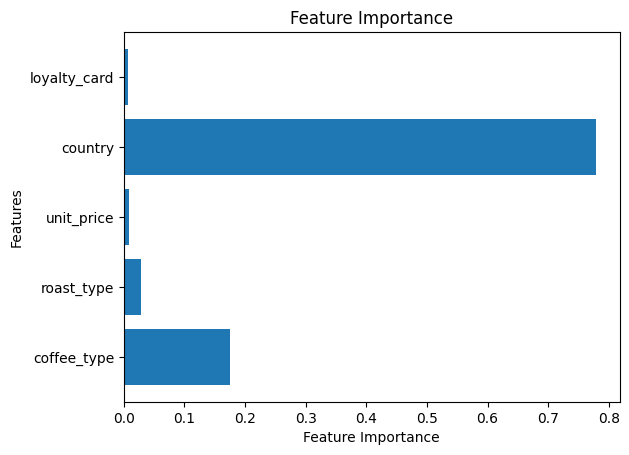

In [155]:

feature_importances = model.feature_importances_

feature_names = x.columns

plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

In [156]:
import pickle

with open('/content/drive/MyDrive/project bi/trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [162]:
Unit_price = 4.755 #@param {type:"number"}

Country = "United Kingdom"  #@param ["United Kingdom", "United States", "Ireland"]

Roast_type = "M" #@param ["M", "L", "D"]

Coffee_type =  "Lib"   #@param['Exc', 'Lib', 'Rob', 'Ara']

Loyalty_card = "Yes" #@param ["Yes", "No"]

if Loyalty_card == "Yes":
  Loyalty_card = 1
else:
  Loyalty_card = 0

# Create a dictionary with your input data
input_data = {
    'coffee_type': [Coffee_type],
    'roast_type': [Roast_type],
    'unit_price': [Unit_price],
    'country': [Country],
    'loyalty_card': [Loyalty_card]
}

# Create a Pandas DataFrame from the dictionary
input_df = pd.DataFrame(input_data)

# Load your trained model
with open('/content/drive/MyDrive/project bi/trained_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Make the prediction
pred = model.predict(input_df)

# Print or display the prediction
print('Predicted profit out of this customer is: ' + str(pred[0]))

Predicted profit out of this customer is: 1.0602444


# **Conclusions**
---